In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# Import data

## Import specified dataset

In [2]:
# Choose dataset
dataset = "synthetic"
# Define possible alphas
alphas = [0.5,1.0,1.5,2.0]
# Select index of alpha
idx = 3
# Select model ('singly' or 'doubly')
model = 'singly'

In [13]:
# Import estimated latent sizes for different values of alpha
hmc = np.loadtxt(f"../data/output/{dataset}/inverse_problem/{model}_hmc_samples_{str(alphas[idx])}.txt")
# Import actual latent sizes
xd0 = np.loadtxt(f"../data/input/{dataset}/initial_destination_sizes.txt") 
xd = np.loadtxt(f"../data/input/{dataset}/final_destination_sizes.txt")

In [14]:
# Select burn in (in terms of number of iterations)
burnin = 0 #3000#int(0.2*hmc.shape[0])

In [15]:
# Take logs on actual sizes
actual_initial_sizes = np.log(xd0/np.sum(xd0))
actual_final_sizes = np.log(xd/np.sum(xd))

# Disregard first burnin iterations
hmc = copy.deepcopy(hmc[burnin:,:])

## Import retail dataset

In [16]:
retail_xd0 = np.loadtxt(f"../cities_and_regions/data/london_n/xd0.txt")
retail_latents = np.loadtxt(f"../cities_and_regions/output/hmc_samples2.0.txt")

# Visualise posterior samples

## Specified dataset

In [17]:
# Select dimension of samples to visualise 
dim = 0

assert dim >= 0 and dim <= hmc.shape[1]

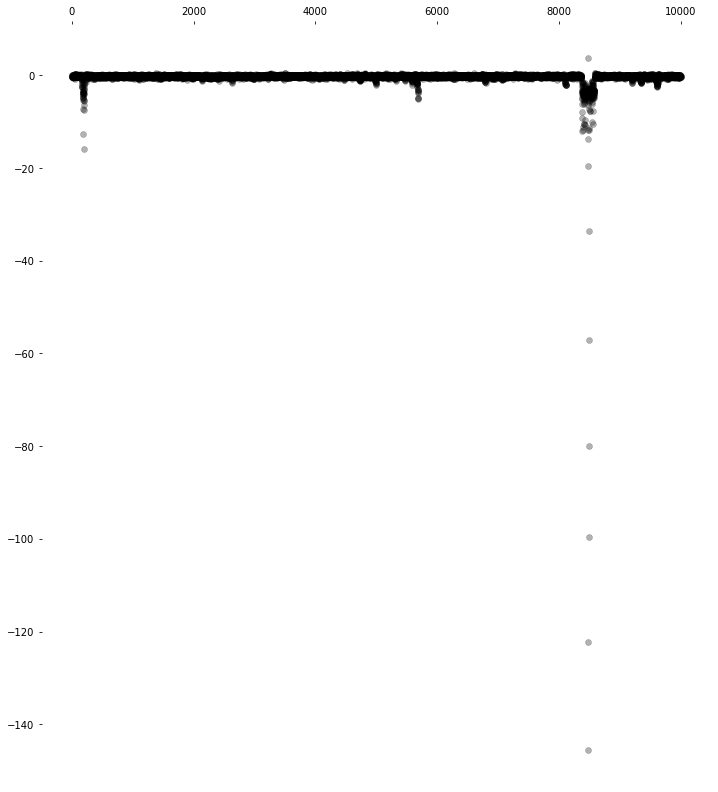

In [18]:
# Plot samples
plt.figure(figsize=(12, 14)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_top()    
ax.get_yaxis().tick_left()    
  
plt.scatter(range(1,hmc.shape[0]+1), hmc[:,dim], lw=0.5, color="black", alpha=0.3)    

plt.show()

In [19]:
# Compute discrepancy between actual and estimated latents
estimated_sizes = np.sum(hmc,axis=0)

### Sample from a Normal centered around destination demands

In [20]:
if model == 'doubly':
    # Import destination demand
    dest_demand = np.loadtxt(f"../data/input/{dataset}/destination_demand.txt")

    # Sample from normal
    baseline_latent_samples = np.random.multivariate_normal(dest_demand[:,0], 0.2*np.identity(dest_demand[:,0].shape[0]), 10000)
    baseline_latents = np.sum(baseline_latent_samples,axis=0)

    # Normalise and take logs
    baseline_latents = np.log(baseline_latents/np.sum(baseline_latents))
    
    print('Naive baseline destination sizes sampled from a Normal centered around destination demand - log normalised')
    baseline_latents

In [21]:
print('HMC sampled latent destination sizes - log normalised')
estimated_sizes

HMC sampled latent destination sizes - log normalised


array([ -3211.51471745, -22679.08239766])

In [22]:
print('Actual destination sizes - log normalised')
actual_initial_sizes

Actual destination sizes - log normalised


array([-1.09861229, -0.40546511])

In [23]:
print("Ratio of HMC sampled latent sizes to actual sizes")
estimated_sizes/actual_initial_sizes

Ratio of HMC sampled latent sizes to actual sizes


array([ 2923.24667271, 55933.49944087])

In [24]:
if model == 'doubly':
    print("Ratio of baseline destination sizes to actual destination sizes")
    baseline_latents/actual_initial_sizes

## Retail data

In [25]:
# Select dimension of samples to visualise 
dim = 4

assert dim >= 0 and dim <= retail_latents.shape[1]

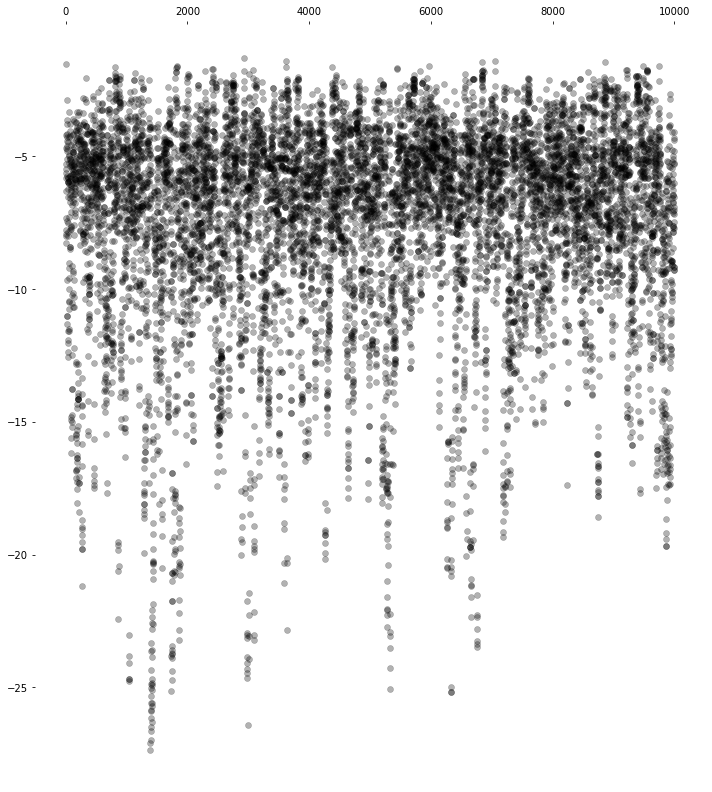

In [26]:
# Plot samples
plt.figure(figsize=(12, 14)) 

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_top()    
ax.get_yaxis().tick_left()    
  
plt.scatter(range(1,retail_latents.shape[0]+1), retail_latents[:,dim], lw=0.5, color="black", alpha=0.3)    

plt.show()

# Measure discrepancy between estimated and actual latent sizes

In [27]:
# Compute discrepancy between actual and estimated latents
retail_estimated_sizes = np.sum(retail_latents,axis=0)

In [28]:
retail_estimated_sizes

array([-77620.56674282, -69616.07303132, -78225.87823416, -81705.60684408,
       -74327.72474714, -85887.11115384, -85380.5287871 , -73397.640742  ,
       -70059.36240636, -81929.07538441, -82527.65352948, -82697.85125488,
       -75161.13040528, -84614.21603418, -73989.54188806, -85716.45293876,
       -77652.77197102, -84904.27519978, -73793.07746709, -85039.48634952,
       -78890.61305455, -76363.21525714, -85720.97636489, -77705.15300766,
       -71243.6113441 , -79212.71897741, -79021.11570825, -83731.14535489,
       -81640.64735048, -78858.50150096, -74652.50776126, -72017.191901  ,
       -76020.18229119, -89129.8383604 , -88950.91041177, -81064.80144043,
       -79554.99901444, -85203.44102075, -72096.87388712, -78433.36138314,
       -86363.6245027 , -80078.99969609, -77616.65277618, -77598.232938  ,
       -78273.45184018, -81677.5202759 , -81796.90942592, -80355.73825777,
       -78794.55156071])

In [29]:
retail_xd0

array([-1.48623058, -3.03561986, -3.58171342, -3.03525569, -3.87291895,
       -3.34915369, -3.82990594, -3.90168635, -3.48825664, -3.87325777,
       -3.92661348, -3.17789396, -3.40539764, -3.57490902, -4.86212472,
       -4.70632978, -4.17330661, -4.68831218, -4.71656632, -4.68358147,
       -4.35330522, -4.67804156, -4.66047408, -4.76948955, -4.43912399,
       -4.6066787 , -4.8085742 , -4.84311755, -4.74705539, -4.53253984,
       -4.49367686, -4.158178  , -3.94227875, -4.4910578 , -4.73283018,
       -5.08596643, -4.15282888, -4.15494191, -4.78449456, -4.90640552,
       -4.54446739, -4.37145383, -4.31035627, -4.18577967, -4.45179342,
       -4.64815625, -4.34967244, -4.81360046, -4.74668877])

In [30]:
retail_estimated_sizes/retail_xd0

array([52226.46334519, 22933.06677676, 21840.35096664, 26918.85468831,
       19191.65510579, 25644.42215451, 22293.11377514, 18811.77372444,
       20084.34860249, 21152.49753082, 21017.5139193 , 26022.84794561,
       22071.17594582, 23668.91455802, 15217.53270093, 18213.01457395,
       18607.01338063, 18109.77426606, 15645.50828376, 18156.93542576,
       18122.00364724, 16323.75732961, 18393.18807827, 16292.13192665,
       16049.02488346, 17195.19075729, 16433.37762688, 17288.68738796,
       17198.16616377, 17398.30301539, 16612.789518  , 17319.4105604 ,
       19283.30975925, 19846.06795374, 18794.44373067, 15938.91792544,
       19156.82089137, 20506.53001358, 15068.85900617, 15985.9108708 ,
       19004.12458498, 18318.61959239, 18007.0156328 , 18538.53737316,
       17582.45373405, 17572.02553828, 18805.30327508, 16693.47901074,
       16599.89844744])